In [2]:
from pylab import *
from numpy import *
from PIL import Image
from PCV.localdescriptors import harris

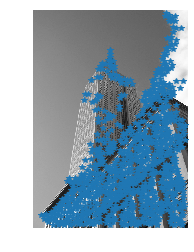

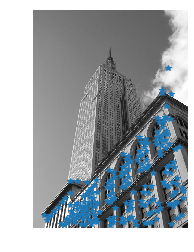

In [3]:
# open image
im = array(Image.open('./data/empire.jpg').convert('L'))

# detect corners and plot
harrisim = harris.compute_harris_response(im)
filtered_coords = harris.get_harris_points(harrisim, 10, threshold=0.01)
harris.plot_harris_points(im, filtered_coords)

# plot only 200 strongest
harris.plot_harris_points(im, filtered_coords[:200])